# Exploratory Data Analysis (On 2011 Census Data)
## 2011 census data is used to answer the following 10 questions using data analysis and data visualisation

### Questions answered are as follows:
1.	How does the population vary across different states or districts?
2.	What is the distribution of rural and urban households within each state?
3.	Which states have the highest and lowest literacy rates?
4.	How does the working population differ between rural and urban areas?
5.	What is the gender distribution among different types of workers (main workers, marginal workers)?
6.	Which states or districts have the highest proportion of scheduled caste or scheduled tribe populations?
7.	How does the population in the age group 0 to 6 years differ between rural and urban areas?
8.	What is the distribution of different types of workers across household industries?
9.	How does the male-female ratio vary across different states or districts?
10.	What is the proportion of the illiterate population among different types of workers?


In [1]:
# Importing pandas will help convert raw 
# data form csv files into readable format
import pandas as pd

# Importing matplotlib will help in data
# visualisation at various phases of the analysis
import matplotlib.pyplot as plt

In [2]:
# Reading data from the file and storing it in df
df = pd.read_csv("NDAP_REPORT_6000.csv")

#### Ques1 - How does the population vary across different states or districts?

In [3]:
# Now we need to find how the population vary across states or districts
# So we create q1a where we group all data by their states 
#          and q1b where we group all data by their districts
# Then sum the data to get statewise or districtwise values

In [4]:
q1a = df.groupby(df.State).sum()
q1a = (q1a[['Population', 'Male population', 'Female population']])
q1a

,Population,Male population,Female population
State,,,
ANDAMAN AND NICOBAR ISLANDS,380581,202871,177710
ANDHRA PRADESH,49577103,24830513,24746590
ARUNACHAL PRADESH,1383727,713912,669815
ASSAM,31205576,15939443,15266133
BIHAR,104099452,54278157,49821295
CHANDIGARH,1055450,580663,474787
CHHATTISGARH,25545198,12832895,12712303
DELHI,16787941,8987326,7800615
GOA,1458545,739140,719405


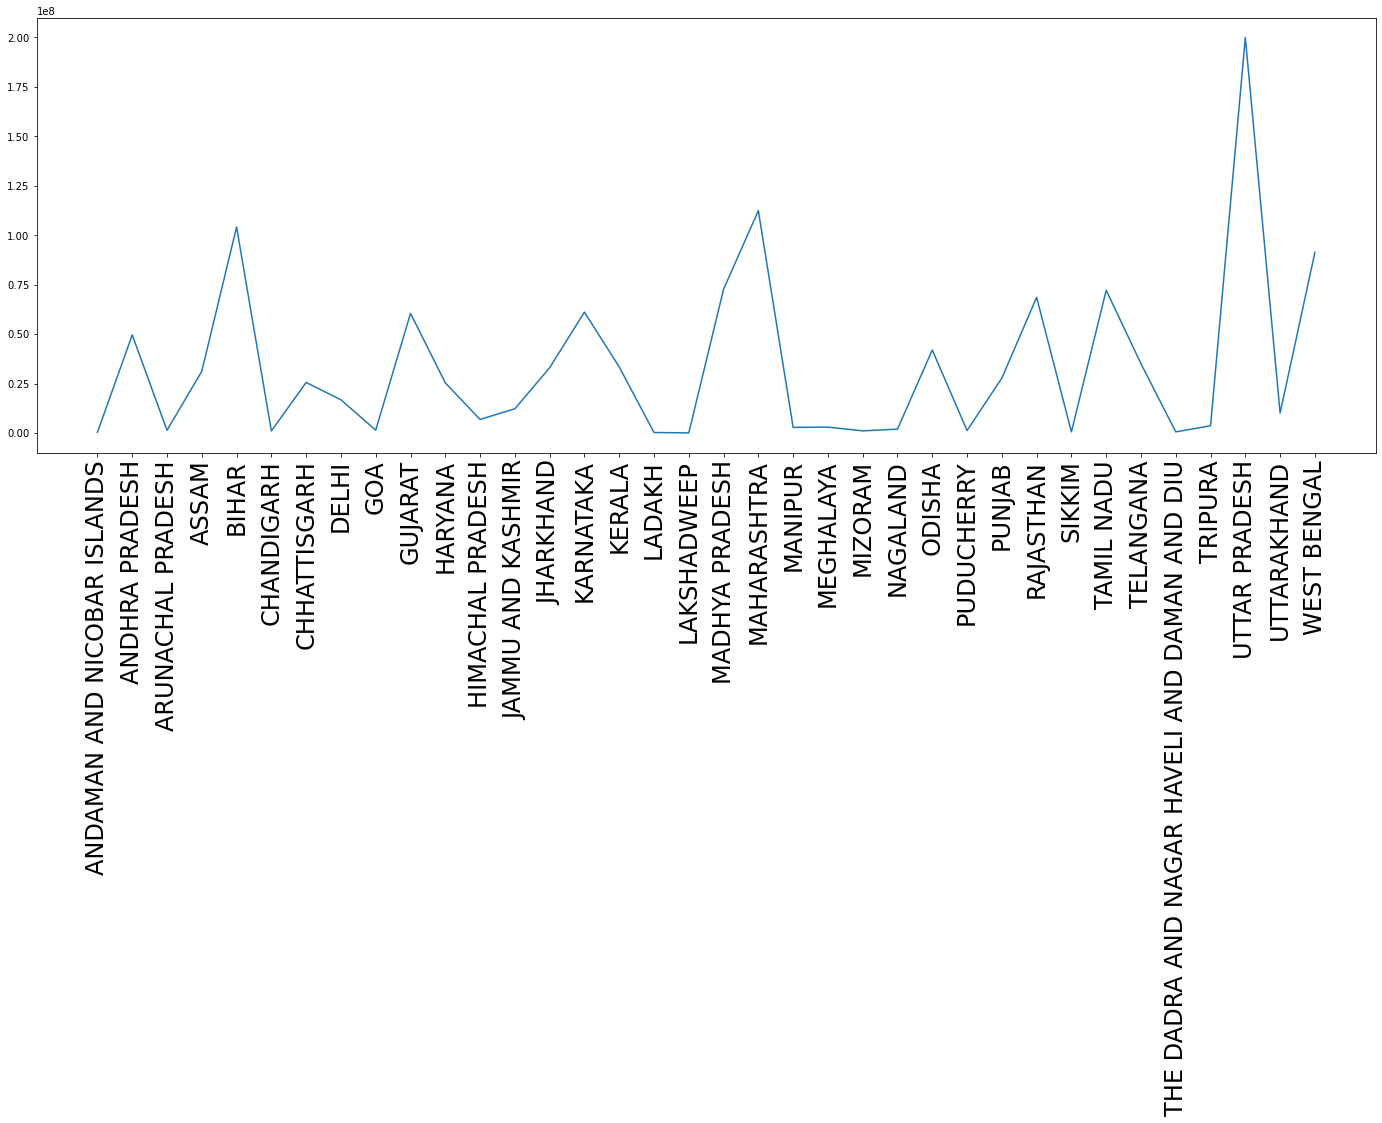

In [5]:
plt.figure(figsize = (24,8))
plt.plot(q1a['Population'])
plt.xticks(rotation = 'vertical', fontsize = 24)
plt.show()

In [6]:
q1b = df.groupby(df.District).sum()
q1b = q1b[['Population', 'Male population', 'Female population']]
q1b

,Population,Male population,Female population
District,,,
24 PARAGANAS NORTH,10009781,5119389,4890392
24 PARAGANAS SOUTH,8161961,4173778,3988183
ADILABAD,708972,356407,352565
AGAR MALWA,571278,293052,278226
AGRA,4418797,2364953,2053844
...,...,...,...
YADGIR,1174271,590329,583942
YAMUNANAGAR,1214205,646718,567487
YANAM,55626,27301,28325


In [7]:
# Similarly, the population for the district data can be plotted

#### Ques2 - What is the distribution of rural and urban households within each state?

In [8]:
# Now we need to find how the rural and urban households vary across states
# So we first divide the table of 'Rural or Urban' using Label Encoder and 
#       then we calclate the rural and urban households statewise 
# Then we create q2 where we group all data by their states 
# Then sum the data to get statewise values

In [9]:
# Copying data about 'State', 'Rural or Urban', 'Households', 'Population', 'Male population', 'Female population'
#         from the df table and storing it in new_df.
new_df = df[['State', 'Rural or Urban', 'Households', 'Population', 'Male population', 'Female population']].copy()

# Importing LabelEncoder from sklearn.preprcessing to convert the table 'Rural or Urban' into integer labels 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
new_df['Rural or Urban'] = le.fit_transform(df['Rural or Urban'])
# Here 1 refers to Urban and 0 refers to Rural

new_df

,State,Rural or Urban,Households,Population,Male population,Female population
0,GUJARAT,1,1,5,5,0
1,GUJARAT,1,5,18,18,0
2,ODISHA,1,2,3,3,0
3,UTTARAKHAND,1,297,612,609,3
4,JAMMU AND KASHMIR,1,77,1965,1957,8
...,...,...,...,...,...,...
606673,TELANGANA,0,1010,5344,2801,2543
606674,TELANGANA,0,127,651,347,304
606675,TELANGANA,0,25,107,54,53
606676,LADAKH,0,48,266,116,150


In [10]:
# Making new columns for Urban and Rural households 
# Urban Household = Labels for 'Rural or Urban'*'Households'
# Rural Household = Total no. of households - Total no. of Urban Households
new_df['Urban Households'] = (new_df['Rural or Urban']*df['Households'])
new_df['Rural Households'] = new_df['Households']-new_df['Urban Households']

# Similarly the population, male population and female population 
#       columns are divided into rural and household populations
#       using the above method
new_df['Urban Population'] = (new_df['Rural or Urban']*df['Population'])
new_df['Rural Population'] = new_df['Population']-new_df['Urban Population']

new_df['Urban Male Population'] = (new_df['Rural or Urban']*df['Male population'])
new_df['Rural Male Population'] = new_df['Male population']-new_df['Urban Male Population']

new_df['Urban Female Population'] = (new_df['Rural or Urban']*df['Female population'])
new_df['Rural Female Population'] = new_df['Female population']-new_df['Urban Female Population']

In [11]:
# Dropping the irrelevant columns and storing the remaining into a new dataset q2
q2 = new_df.drop(df[['Rural or Urban', 'Households', 'Population', 'Male population', 'Female population']], axis = 'columns')

In [12]:
# Grouping the dataset by states and summing the values
q2.groupby('State').sum()

,Urban Households,Rural Households,Urban Population,Rural Population,Urban Male Population,Rural Male Population,Urban Female Population,Rural Female Population
State,,,,,,,,
ANDAMAN AND NICOBAR ISLANDS,36021,58530,143488,237093,76584,126287,66904,110806
ANDHRA PRADESH,3653618,9065358,14610410,34966693,7292265,17538248,7318145,17428445
ARUNACHAL PRADESH,70367,200210,317369,1066358,167901,546011,149468,520347
ASSAM,985594,5420877,4398542,26807034,2260454,13678989,2138088,13128045
BIHAR,2050625,16862940,11758016,92341436,6204307,48073850,5553709,44267586
CHANDIGARH,234033,7140,1026459,28991,563513,17150,462946,11841
CHHATTISGARH,1285156,4365568,5937237,19607961,3035469,9797426,2901768,9810535
DELHI,3356425,79574,16368899,419042,8761005,226321,7607894,192721
GOA,215403,128208,906814,551731,463704,275436,443110,276295


#### Ques3 - Which states have the highest and lowest literacy rates?

In [13]:
# Now we need to find how the literacy rates vary across different states

In [14]:
# So we first select the relevant columns and group them by states
new_df3 = df[['State','Population','Male population', 'Female population' ,'Literate population ', 'Male literate population', 'Female literate population ']].copy()

# Then we add the values of each columns by states
new_df3 = new_df3.groupby('State').sum()

# Then we calculate the percentage of literate population among the
#         total population, male population and female population
new_df3['Literacy Rate'] = new_df3['Literate population ']/new_df3['Population']*100
new_df3['Male Literacy Rate'] = new_df3['Male literate population']/new_df3['Male population']*100
new_df3['Female Literacy Rate'] = new_df3['Female literate population ']/new_df3['Female population']*100

# Then we create q3 where we drop the irrelevant columns and store the remaining columns
q3 = new_df3.drop(df[['Population','Male population', 'Female population' ,'Literate population ', 'Male literate population', 'Female literate population ']], axis = 'columns')

In [15]:
q3.head()

,Literacy Rate,Male Literacy Rate,Female Literacy Rate
State,,,
ANDAMAN AND NICOBAR ISLANDS,77.324144,81.025381,73.098869
ANDHRA PRADESH,60.229380,66.649908,53.787079
ARUNACHAL PRADESH,55.358102,61.613756,48.690609
ASSAM,61.456892,66.304946,56.395015
BIHAR,50.436916,58.233412,41.942968


In [16]:
# To calculate the minimum and maximum literacy rates,
#    we need to use the .max() and .min() functions

q3MaxMin=pd.DataFrame()
q3MaxMin['State']=[q3['Literacy Rate'].idxmax(), q3['Literacy Rate'].idxmin()]
q3MaxMin['Maximum & Minimum Literacy Rates']=[q3['Literacy Rate'].max(), q3['Literacy Rate'].min()]
q3MaxMin['Male Literacy Rate'] = [q3._get_value('KERALA', 'Male Literacy Rate'),q3._get_value('BIHAR', 'Male Literacy Rate')]
q3MaxMin['Female Literacy Rate'] = [q3._get_value('KERALA', 'Female Literacy Rate'),q3._get_value('BIHAR', 'Female Literacy Rate')]
q3MaxMin

,State,Maximum & Minimum Literacy Rates,Male Literacy Rate,Female Literacy Rate
0,KERALA,84.223710,85.509145,83.038221
1,BIHAR,50.436916,58.233412,41.942968


In [17]:
# Here we can see that as per the 2011 census data, 
# Kerala was the most and Bihar was the least literate state.

#### Q4 - How does the working population differ between rural and urban areas?

In [18]:
# Now we need to find how the working population vary across rural and urban areas

In [19]:
# First we copy the relevant columns from the df dataset 
# Then sum the values after grouping them by the columns 'Rural or Urban'
new_df4 = df[['Population','Male population', 'Female population','Rural or Urban','Working population','Male working population', 'Female Woking population']].copy()
new_df4 = new_df4.groupby('Rural or Urban').sum()

# Then we calculate the percentage of the working population in both areas
new_df4['Working Population %'] = (new_df4['Working population']/new_df4['Population'])*100
new_df4['Male Working Population %'] = (new_df4['Male working population']/new_df4['Male population'])*100
new_df4['Female Working Population %'] = (new_df4['Female Woking population']/new_df4['Female population'])*100

In [20]:
# Storing the data in q4 and dropping the the irrelevant columns
q4 = new_df4.drop(new_df4[['Population', 'Male population', 'Female population', 'Working population', 'Male working population', 'Female Woking population']], axis = 'columns')

In [21]:
q4

,Working Population %,Male Working Population %,Female Working Population %
Rural or Urban,,,
Rural,41.828315,53.026428,30.028510
Urban,35.307261,53.764045,15.440676


In [22]:
# Here we can see that the rural areas in India hasd about 
#     6% more working population than urban areas in 2011

#### Q5 - What is the gender distribution among different types of workers (main workers, marginal workers)?

In [23]:
# Here we need to find the gender distrinution in different types of workers

In [24]:
# Copying the relevant columns from df and summing the data after grouping them by the states
new_df5 = df[['State', 'Population','Male population', 'Female population','Number of main workers', 'Number of male main workers', 'Number of female main worker', 'Number of marginal workers', 'Number of male marginal workers', 'Number of female marginal workers']].copy()
new_df5 = new_df5.groupby('State').sum()

# Calculating the male to female ratio for both Main and Marginal Workers
new_df5['Main_Worker(Female to Male Ratio)'] = new_df5['Number of female main worker']/new_df5['Number of male main workers']
new_df5['Marginal_Worker(Female to Male Ratio)'] = new_df5['Number of female marginal workers']/new_df5['Number of male marginal workers']

In [25]:
# Storing the data in q5 and dropping the the irrelevant columns
q5 = new_df5.drop(new_df5[['Population','Male population', 'Female population','Number of main workers', 'Number of male main workers', 'Number of female main worker', 'Number of marginal workers', 'Number of male marginal workers', 'Number of female marginal workers']], axis = 'columns')
q5

,Main_Worker(Female to Male Ratio),Marginal_Worker(Female to Male Ratio)
State,,
ANDAMAN AND NICOBAR ISLANDS,0.215125,0.541691
ANDHRA PRADESH,0.493220,1.396174
ARUNACHAL PRADESH,0.589859,1.215768
ASSAM,0.234906,1.178332
BIHAR,0.236755,0.680862
CHANDIGARH,0.216712,0.659860
CHHATTISGARH,0.472404,1.563447
DELHI,0.163197,0.403400
GOA,0.333605,0.617334


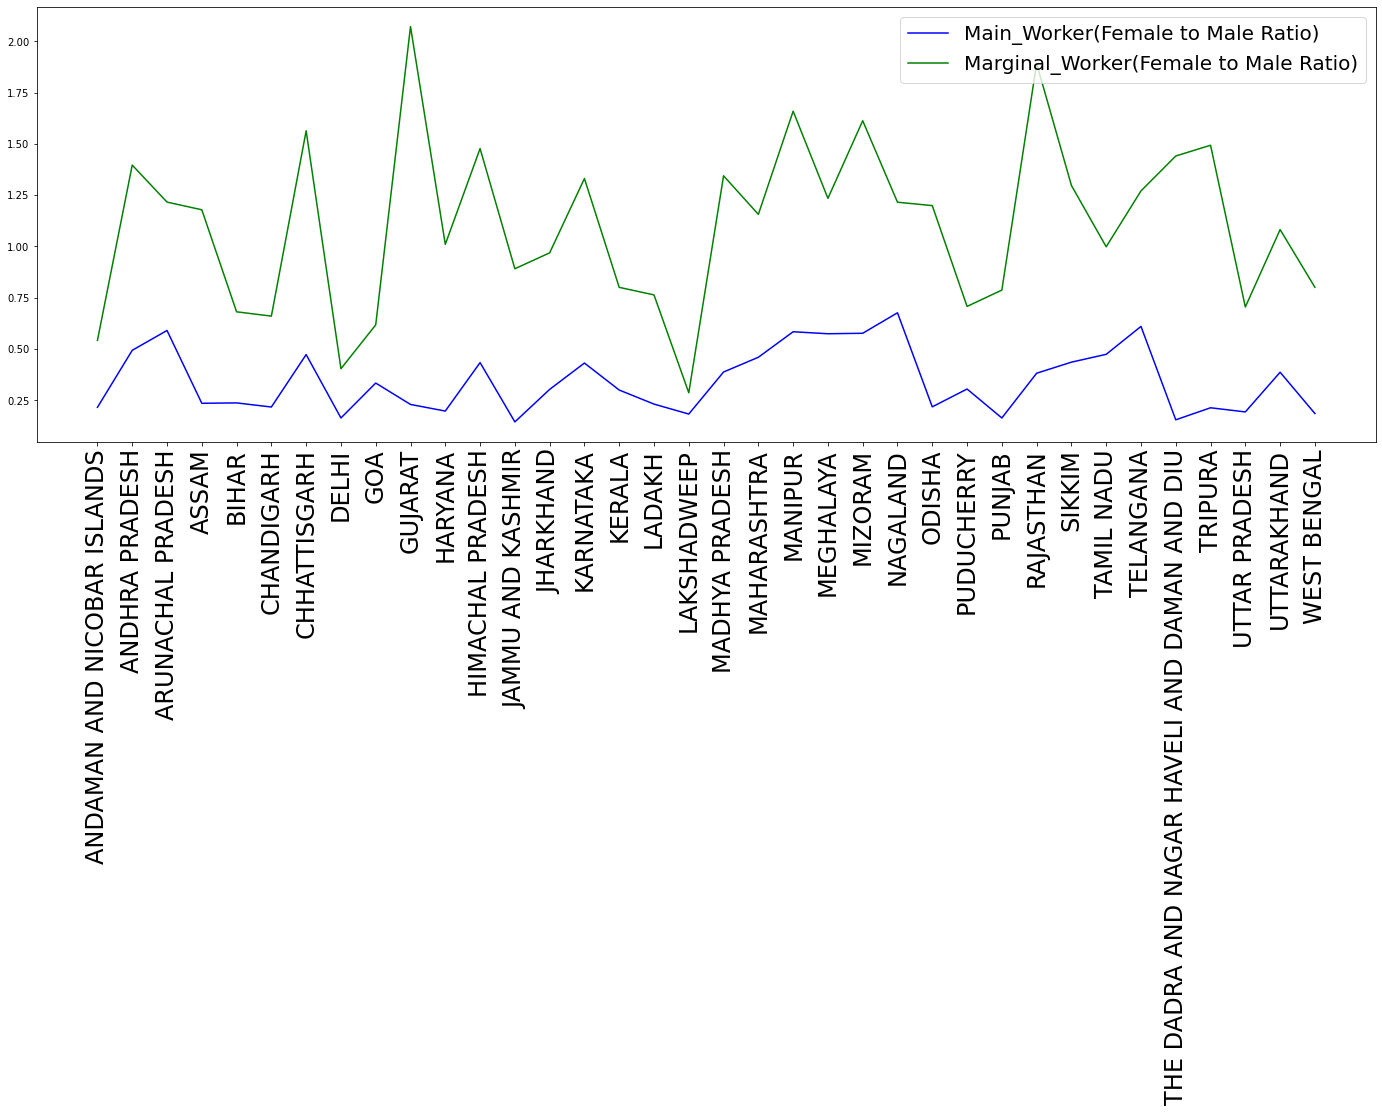

In [26]:
plt.figure(figsize = (24,8))
plt.plot(q5['Main_Worker(Female to Male Ratio)'], color = 'blue')
plt.plot(q5['Marginal_Worker(Female to Male Ratio)'], color = 'green')
plt.legend(['Main_Worker(Female to Male Ratio)', 'Marginal_Worker(Female to Male Ratio)'], loc='upper right', fontsize=20)
plt.xticks(rotation = 'vertical', fontsize = 24)
plt.show()

In [27]:
# Here we can clearly see that markinal work has better female to male ratio than main work

#### Q6 - Which states or districts have the highest proportion of scheduled caste or scheduled tribe populations?

In [28]:
# Now we need to find the state and district with highest proportion
#        of scheduled caste or scheduled tribe populations

In [29]:
# Copying relevant data from df and grouping them by state and district and then summing the data
new_df6 = df[['Population', 'Male population', 'Female population','State', 'District', 'Scheduled Caste population', 'Male Scheduled Caste population', 'Female Scheduled Caste population ', 'Scheduled Tribe population', 'Male Scheduled Tribe population', 'Female Scheduled Tribe population ']].copy()
new_df6State = new_df6.groupby(new_df6['State']).sum()
new_df6District = new_df6.groupby(new_df6['District']).sum()

In [30]:
# Calculating percentage of the SC and ST populations
new_df6State['SC Population%'] = (new_df6State['Scheduled Caste population']/new_df6State['Population'])*100
new_df6State['ST Population%'] = (new_df6State['Scheduled Tribe population']/new_df6State['Population'])*100
new_df6District['SC Population%'] = (new_df6District['Scheduled Caste population']/new_df6District['Population'])*100
new_df6District['ST Population%'] = (new_df6District['Scheduled Tribe population']/new_df6District['Population'])*100

In [31]:
# Now dropping the irrelevant columns

In [32]:
q6a = new_df6State.drop(new_df6State[['Male population', 'Female population', 'Scheduled Caste population', 'Male Scheduled Caste population', 'Female Scheduled Caste population ', 'Scheduled Tribe population', 'Male Scheduled Tribe population', 'Female Scheduled Tribe population ']], axis = 'columns')
q6a

,Population,SC Population%,ST Population%
State,,,
ANDAMAN AND NICOBAR ISLANDS,380581,0.000000,7.496433
ANDHRA PRADESH,49577103,17.083043,5.527013
ARUNACHAL PRADESH,1383727,0.000000,68.786762
ASSAM,31205576,7.150392,12.447682
BIHAR,104099452,15.914901,1.283939
CHANDIGARH,1055450,18.862665,0.000000
CHHATTISGARH,25545198,12.817552,30.623767
DELHI,16787941,16.751959,0.000000
GOA,1458545,1.744821,10.234515


In [33]:
# To calculate the maximum SC and ST Population %,
#    we need to use the .max() function

q6aMaxMin=pd.DataFrame()
q6aMaxMin['MaxSC%_State']=[q6a['SC Population%'].idxmax()]
q6aMaxMin['Maximum SC%']=[q6a['SC Population%'].max()]
q6aMaxMin['MaxST%_State']=[q6a['ST Population%'].idxmax()]
q6aMaxMin['Maximum ST%']=[q6a['ST Population%'].max()]
q6aMaxMin

,MaxSC%_State,Maximum SC%,MaxST%_State,Maximum ST%
0,PUNJAB,31.93624,LAKSHADWEEP,94.799373


In [34]:
# Here we can clearly see that 
#   Punjab has highest SC%
#   Lakshadweep has highest ST%

In [35]:
q6b = new_df6District.drop(new_df6State[['Male population', 'Female population', 'Scheduled Caste population', 'Male Scheduled Caste population', 'Female Scheduled Caste population ', 'Scheduled Tribe population', 'Male Scheduled Tribe population', 'Female Scheduled Tribe population ']], axis = 'columns')
q6b

,Population,SC Population%,ST Population%
District,,,
24 PARAGANAS NORTH,10009781,21.669645,2.643385
24 PARAGANAS SOUTH,8161961,30.189216,1.188146
ADILABAD,708972,14.023403,31.682774
AGAR MALWA,571278,23.788418,2.440318
AGRA,4418797,22.434273,0.164185
...,...,...,...
YADGIR,1174271,23.275292,12.505546
YAMUNANAGAR,1214205,25.262867,0.000000
YANAM,55626,15.149391,0.000000


In [36]:
# To calculate the maximum SC and ST Population %,
#    we need to use the .max() function

q6bMaxMin=pd.DataFrame()
q6bMaxMin['MaxSC%_State']=[q6b['SC Population%'].idxmax()]
q6bMaxMin['Maximum SC%']=[q6b['SC Population%'].max()]
q6bMaxMin['MaxST%_State']=[q6b['ST Population%'].idxmax()]
q6bMaxMin['Maximum ST%']=[q6b['ST Population%'].max()]
q6bMaxMin

,MaxSC%_State,Maximum SC%,MaxST%_State,Maximum ST%
0,COOCHBEHAR,50.17002,Hnahthial,98.806515


In [37]:
# Here we can clearly see that 
#   COOCHBEHAR has highest SC%
#   Hnahthial has highest ST%

#### Q7 - How does the population in the age group 0 to 6 years differ between rural and urban areas?

In [38]:
# Here we need to how rural and urban areas differ 
#      in population in the age group 0 to 6 years

In [39]:
# Here we copied the data from df and summed it 
#   after grouping by the column 'Rural or Urban'
new_df7 = df[['Population','Male population', 'Female population','Rural or Urban','Population in the age group 0 to 6 years','Male Population in the age group 0 to 6 years', 'Female Population in the age group 0 to 6 years']].copy()
new_df7 = new_df7.groupby('Rural or Urban').sum()

#Calculating population percent for the age group 0 to 6 years
new_df7['Population in the age group 0 to 6 years %'] = (new_df7['Population in the age group 0 to 6 years']/new_df7['Population'])*100
new_df7['Male Population in the age group 0 to 6 years %'] = (new_df7['Male Population in the age group 0 to 6 years']/new_df7['Male population'])*100
new_df7['Female Population in the age group 0 to 6 years %'] = (new_df7['Female Population in the age group 0 to 6 years']/new_df7['Female population'])*100

In [40]:
q7 = new_df7.drop(new_df7[['Population in the age group 0 to 6 years', 'Male Population in the age group 0 to 6 years', 'Female Population in the age group 0 to 6 years']], axis = 'columns')
q7

,Population,Male population,Female population,Population in the age group 0 to 6 years %,Male Population in the age group 0 to 6 years %,Female Population in the age group 0 to 6 years %
Rural or Urban,,,,,,
Rural,833748852,427781058,405967794,14.551488,14.746901,14.345575
Urban,377131000,195502261,181628739,11.453622,11.595375,11.301042


In [41]:
# Here you can see Rural areas have approximately 3%  
#      more people in this age group than urban areas

#### Q8 - What is the distribution of different types of workers across household industries?

In [42]:
# Here we see the how workers are distributed across different household industries

In [43]:
new_df8 = df[['State','Population','Male population', 'Female population','Number of main workers in the household industry', 'Number of male main workers in the household industry', 'Number of female main workers in the household industry', 'Number of marginal workers in the household industry', 'Number of male marginal workers in the household industry', 'Number of female marginal workers in the household industry']].copy()
new_df8 = new_df8.groupby('State').sum()
new_df8['Main to Marginal Ratio(In households)'] = new_df8['Number of main workers in the household industry']/new_df8['Number of marginal workers in the household industry']
new_df8['Main to Marginal Ratio(In households) For Male population'] = new_df8['Number of male main workers in the household industry']/new_df8['Number of male marginal workers in the household industry']
new_df8['Main to Marginal Ratio(In households) For Female Population'] = new_df8['Number of female main workers in the household industry']/new_df8['Number of female marginal workers in the household industry']
q8 = new_df8.drop(new_df8[['Population','Male population', 'Female population','Number of main workers in the household industry', 'Number of male main workers in the household industry', 'Number of female main workers in the household industry', 'Number of marginal workers in the household industry', 'Number of male marginal workers in the household industry', 'Number of female marginal workers in the household industry']], axis = 'columns')
q8

,Main to Marginal Ratio(In households),Main to Marginal Ratio(In households) For Male population,Main to Marginal Ratio(In households) For Female Population
State,,,
ANDAMAN AND NICOBAR ISLANDS,0.594780,0.749420,0.403257
ANDHRA PRADESH,3.948566,6.613019,2.421867
ARUNACHAL PRADESH,1.299973,2.014535,0.865104
ASSAM,0.971198,2.476697,0.502467
BIHAR,1.234225,1.788362,0.811527
CHANDIGARH,7.274138,15.684211,2.536388
CHHATTISGARH,2.683734,4.240200,1.534723
DELHI,13.289800,21.837195,3.819281
GOA,2.744399,4.260986,1.371969


#### Q9 - How does the male-female ratio vary across different states or districts?

In [44]:
# Here we see the how male-to-female ratio vary across different states and districts

In [45]:
new_df9 = df[['State', 'District', 'Male population', 'Female population']].copy()
new_df9State = new_df9.groupby('State').sum()
new_df9District = new_df9.groupby('District').sum()
new_df9State['Male-to-Female Ratio'] = new_df9State['Male population']/new_df9State['Female population']
new_df9District['Male-to-Female Ratio'] = new_df9District['Male population']/new_df9District['Female population']
q9a = new_df9State.drop(new_df9State[['Male population', 'Female population']], axis = 'columns')
q9b = new_df9District.drop(new_df9District[['Male population', 'Female population']], axis = 'columns')

In [46]:
q9a

,Male-to-Female Ratio
State,
ANDAMAN AND NICOBAR ISLANDS,1.141585
ANDHRA PRADESH,1.003391
ARUNACHAL PRADESH,1.065835
ASSAM,1.044105
BIHAR,1.089457
CHANDIGARH,1.222997
CHHATTISGARH,1.009486
DELHI,1.152130
GOA,1.027432


In [47]:
# State with maximum Male-to-Female Ratio
pd.DataFrame([q9a.max()], q9a.idxmax())

,Male-to-Female Ratio
THE DADRA AND NAGAR HAVELI AND DAMAN AND DIU,1.416501


In [48]:
# State with minimum Male-to-Female Ratio
(pd.DataFrame([q9a.min()], q9a.idxmin()))

,Male-to-Female Ratio
KERALA,0.922247


In [49]:
q9b

,Male-to-Female Ratio
District,
24 PARAGANAS NORTH,1.046826
24 PARAGANAS SOUTH,1.046536
ADILABAD,1.010897
AGAR MALWA,1.053288
AGRA,1.151476
...,...
YADGIR,1.010938
YAMUNANAGAR,1.139617
YANAM,0.963848


In [50]:
# District with maximum Male-to-Female Ratio
pd.DataFrame([q9b.max()], q9b.idxmax())

,Male-to-Female Ratio
DAMAN,1.874177


In [51]:
# District with minimum Male-to-Female Ratio
(pd.DataFrame([q9b.min()], q9b.idxmin()))

,Male-to-Female Ratio
MAHE,0.844308


#### Q10 - What is the proportion of illiterate population among different types of workers?

In [52]:
# Here we see How proportion of illiterate population 
#      vary among different types of workers

In [53]:
new_df10 = df[['State', 'Population', 'Illiterate population', 'Number of main workers as cultivators', 'Number of main workers as agricultural labourers', 'Number of main workers in the household industry', 'Number of  main workers as Other workers', 'Number of marginal workers as cultivators', 'Number of marginal workers as agricultural labourers', 'Number of marginal workers in the household industry', 'Number of marginal workers as Other workers']].copy()
new_df10 = new_df10.groupby('State').sum()
new_df10['Illiterate Population of Main Workers as cultivators'] = round((new_df10['Illiterate population']/new_df10['Number of main workers as cultivators'])*100)
new_df10['Illiterate Population of Main Workers as agricultural labourers'] = round((new_df10['Illiterate population']/new_df10['Number of main workers as agricultural labourers'])*100)
new_df10['Illiterate Population of Main Workers in the household industry'] = round((new_df10['Illiterate population']/new_df10['Number of main workers in the household industry'])*100)

q10 = new_df10.drop(new_df10[['Population', 'Illiterate population', 'Number of main workers as cultivators', 'Number of main workers as agricultural labourers', 'Number of main workers in the household industry', 'Number of  main workers as Other workers', 'Number of marginal workers as cultivators', 'Number of marginal workers as agricultural labourers', 'Number of marginal workers in the household industry', 'Number of marginal workers as Other workers']], axis = 'columns')

import numpy as np
q10.replace([np.inf], 0, inplace=True)

q10

,Illiterate Population of Main Workers as cultivators,Illiterate Population of Main Workers as agricultural labourers,Illiterate Population of Main Workers in the household industry
State,,,
ANDAMAN AND NICOBAR ISLANDS,664.0,3220.0,6209.0
ANDHRA PRADESH,637.0,229.0,3729.0
ARUNACHAL PRADESH,249.0,3049.0,13065.0
ASSAM,383.0,1332.0,4969.0
BIHAR,953.0,541.0,6618.0
CHANDIGARH,11527.0,17909.0,5926.0
CHHATTISGARH,335.0,406.0,7436.0
DELHI,14590.0,12868.0,2395.0
GOA,1218.0,2724.0,2719.0
